In [1]:
from sympy import *

In [2]:
init_session()

IPython console for SymPy 1.3 (Python 3.7.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.3/



$$m>0$$

In [3]:
F,Ib,M = symbols('F I M',cls=Function)
x,y,p,p0,Ic,m,z0 = symbols('x y p p_0 I_c m z_0', positive=True)

In [111]:
Eq(Ib(p), Ic*p**(-m))

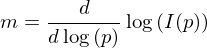

In [112]:
Eq(m,Derivative(log(Ib(p)),log(p)))

In [113]:
Eq(log(Ib(p)), expand_log(log(Ic*p**(-m))))

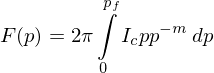

In [114]:
Eq(F(p),2*pi*Integral(Ic*p**(-m)*p,(p,0,S('p_f'))))

In [49]:
e = Eq(F(p),simplify(2*pi*integrate(Ic*p**(-m)*p,(p,p0,S('p_f')))))
#e = e.args[1].args[0][0].subs([[S('p_f'),p]])
e.args[1].args[0][0].expand().subs([[p0,0]])

In [21]:
%%markdown
$$F(p) = \frac{2\pi I_c}{m-2}\left(\frac{1}{p_0^{m-2}}-\frac{1}{p^{m-2}}\right)$$

$$F(p) = \frac{2\pi I_c}{m-2}\left(\frac{1}{p_0^{m-2}}-\frac{1}{p^{m-2}}\right)$$


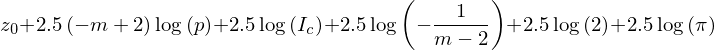

In [143]:
with assuming(Q.is_true(m<2)):
    e = Eq(M(p),expand_log(2.5*log(e)+z0))
e.args[1]

In [ ]:
A, B = symbols('A B')
Eq(A,2.5*(2-m)*log(p))
Eq(B)

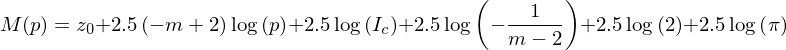

In [144]:
Eq(M(p),e.args[1])

In [54]:
log(2*pi*Ic*p**(m + 2)/(m + 2)).expand()

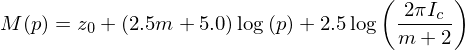

In [58]:
Eq(M(p),2.5*log(2*pi*Ic/(m + 2))+2.5*(m+2)*log(p)+z0)

$$M(p) = c_0+2.5(m+2)\ln(p)$$

In [60]:
Eq(I(p),Ic/p**m)

$$m=2$$

$$F(p) = I_c\ln\left(\frac{p}{p_0}\right)$$

$$m>1$$

$$F(p)=2\pi I_c\frac{p^{2-m}}{2-m}$$

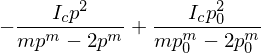

In [272]:
e = integrate(Ic*x*x**(-m),(x,p0,p))
e.args[0][0]

$$I_c\left[\left(\frac{p_0^{2-m}}{2-m}\right)-\left(\frac{p^{2-m}}{2-m}\right)\right]$$

$$\frac{I_c}{2-m}\left(p_0^{2-m}-p^{2-m}\right)$$

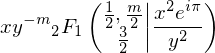

In [51]:
integrate(1/sqrt(x**2+y**2)**m,x)

Definindo funções integradas sobre a função $I(p)$ em coordenadas cartesianas

In [5]:
def result1(x,y,m):
    return x/y**m*hyper((1/2, m/2), (3/2,), -x**2/y**2)

def result2(x,y,m):
    return x*y**(1-m)*(hyper(((m - 1)/2, m/2), ((m + 1)/2,), -x**2/y**2)/(m - 1) -\
           hyper((1/2, m/2), (3/2,), -x**2/y**2))/(m-2)

$$4\left(\int_0^p\int_{p_0}^pdxdy+\int_{p_0}^p\int_0^{p_0}dxdy\right)$$

In [24]:
Quad = 4*simplify(result2(p0,p,m).simplify()-result2(0,p,m).simplify()\
                  -(result2(p0,p0,m).simplify()-result2(0,p0,m).simplify()))

In [25]:
Quad = Quad + 4*simplify(result2(p,p,m).simplify()-result2(p0,p,m).simplify()
                         -(result2(p,0,m).simplify()-result2(p0,0,m).simplify()))
Quad = Quad.subs([[m,1.5],[p0,3],[p,x]])

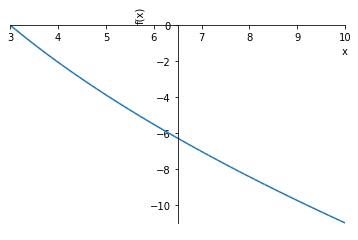

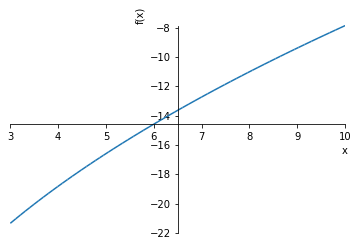

In [28]:
%matplotlib inline
P1 = plot(Quad,(x,3,10))
P2 = plot(2*pi/(2-1.5)*(-3**(2-1)+(x/sqrt(pi))**(2-1.5)),(x,3,10))
P1.append(P2[0])

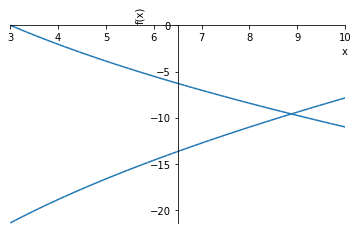

In [29]:
P1.show()

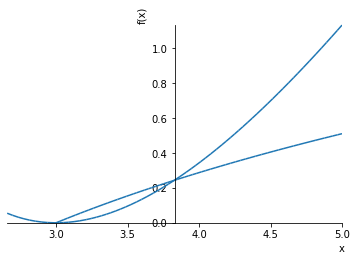

In [111]:
P1.show()

Para mesmas áreas: _annulus_ quadrado $$4p_q^2-4p_{q0}^2=\pi p^2-\pi p_0^2$$

Mas o círculo interno e o quadrado interno devem também ter as mesmas áreas, logo: $$p_q = \frac{\sqrt{\pi}}{2}p$$

# Plotando vários boxes e círculos de uma imagem
Fazendo empiricamente o fluxo em função da imagem

In [112]:
from astropy.io import fits

In [118]:
data = fits.open('../aa1.fit')[0].data

In [172]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import ContrastBiasStretch, HistEqStretch
from photutils import CircularAperture, RectangularAperture, aperture_photometry
from astropy.visualization.mpl_normalize import ImageNormalize

from astropy.stats import sigma_clipped_stats
from photutils import find_peaks

from ipywidgets import interact, interactive
from IPython.display import display

## Primeira escolha de posição para tentar centralizar

In [161]:
def ajeitar(x,y,r):
    position = [(x, y)]
    apertures = CircularAperture(position, r=r)
    norm = ImageNormalize(stretch=HistEqStretch(data))
    im = plt.imshow(data, norm=norm, cmap='Greys_r')
    apertures.plot(color='red', lw=1, alpha=0.5)
    plt.show()

In [134]:
linhas = len(data)
colunas = len(data[1])
w = interactive(ajeitar,x=(0, colunas, 1),y=(0, linhas,1),r=(0.1,70,2))

In [135]:
display(w)

interactive(children=(IntSlider(value=364, description='x', max=728), IntSlider(value=245, description='y', ma…

In [136]:
w.kwargs

{'x': 379, 'y': 250, 'r': 68.1}

In [143]:
C = CircularAperture([(w.kwargs['x'],w.kwargs['y'])],w.kwargs['r'])

In [144]:
cometa = C.to_mask('center')[0].multiply(data)

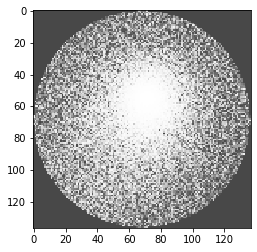

In [149]:
norm = ImageNormalize(stretch=HistEqStretch(cometa))
im = plt.imshow(cometa, norm=norm, cmap='Greys_r')

In [152]:
mean, median, std = sigma_clipped_stats(cometa, sigma=3.0)
threshold = median + (5. * std)
tbl = find_peaks(cometa, threshold, box_size=11)
tbl['peak_value'].info.format

In [153]:
tbl

<Table length=1>
x_peak y_peak peak_value
int64  int64   float64  
------ ------ ----------
    71     55      808.0

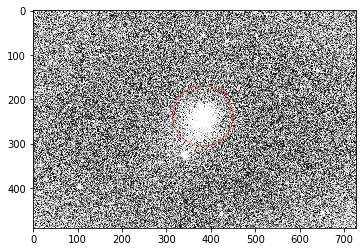

In [159]:
r = w.kwargs['r']
position = (w.kwargs['x']-r+71,w.kwargs['y']-r+55)
apertures = CircularAperture(position, r=w.kwargs['r'])
norm = ImageNormalize(stretch=HistEqStretch(data))
im = plt.imshow(data, norm=norm, cmap='Greys_r')
apertures.plot(color='red', lw=1, alpha=0.5)

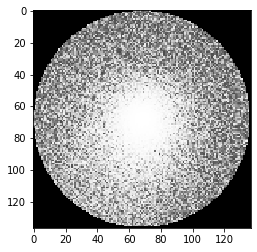

In [160]:
cometa_centro = apertures.to_mask('center')[0].multiply(data)
norm = ImageNormalize(stretch=HistEqStretch(cometa_centro))
im = plt.imshow(cometa_centro, norm=norm, cmap='Greys_r')

In [163]:
len(cometa_centro[0])

In [218]:
Circ = []
Quad = []
mCirc = []
mQuad = []
p = np.linspace(0.5,w.kwargs['r'],40)#120,40)#
for r in p:
    apert = CircularAperture(position,r)
    aux = aperture_photometry(data,apert)['aperture_sum'][0]
    Circ.append(aux)
    mCirc.append(aux/apert.area())
    Qapert = RectangularAperture(position,np.sqrt(np.pi)*r,np.sqrt(np.pi)*r)
    aux =aperture_photometry(data,Qapert)['aperture_sum'][0]
    Quad.append(aux)
    mQuad.append(aux/Qapert.area())
Circ = np.array(Circ)
Quad = np.array(Quad)
mCirc = np.array(mCirc)
mQuad = np.array(mQuad)

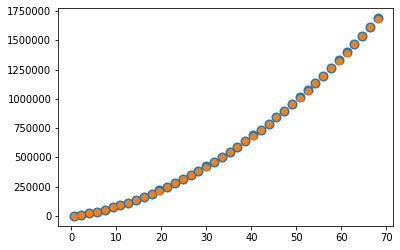

In [208]:
plt.plot(p,np.array(Circ),'o',markersize=9)
plt.plot(p,np.array(Quad),'o')

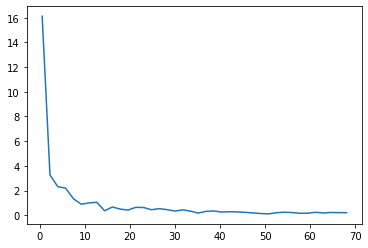

In [214]:
plt.plot(p,np.abs(Circ-Quad)/(np.pi*p*p))

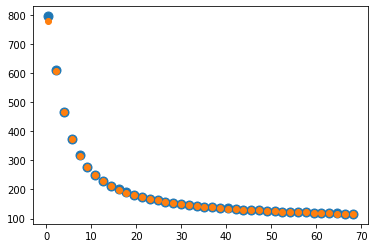

In [228]:
plt.yscale('linear')
plt.xscale('linear')
#plt.xlim(10,70)
#plt.ylim(100,300)
plt.plot(p,mCirc,'o',markersize=9)
plt.plot(p,mQuad,'o')

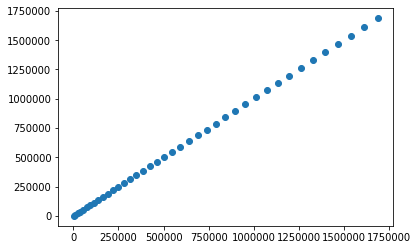

In [231]:
plt.plot(Circ,Quad,'o')

In [192]:
w.kwargs['r']

In [201]:
a=aperture_photometry(data,Qapert)['aperture_sum']

In [207]:
np.array(Quad)-np.array(Circ)

array([  -12.65925804,   -51.20262394,  -114.37003894,  -224.36476938,
        -232.17580596,  -236.20313479,  -372.06962128,  -528.62573225,
        -232.63509055,  -543.81592629,  -497.89943287,  -503.68825619,
        -911.76933663, -1044.61426759,  -858.03900306, -1175.43142543,
       -1138.41394319,  -956.3373204 , -1378.9738427 , -1172.71864286,
        -677.94044351, -1345.85138466, -1622.83686717, -1323.09028997,
       -1590.18125   , -1621.33015553, -1528.70457092, -1322.2988892 ,
       -1046.14823083,  -866.79570119, -1736.70286182, -2268.01014002,
       -2142.20146238, -1659.61657886, -1816.88553107, -2791.94291716,
       -2293.90879433, -2932.18436908, -2960.48397626, -3012.06827937])

In [215]:
aperture_photometry(data,Qapert)

<QTable length=1>
  id  xcenter ycenter   aperture_sum  
        pix     pix                   
int64 float64 float64     float64     
----- ------- ------- ----------------
    1   381.9   236.9 1686791.75390625

In [217]:
apert.area()

# Cálculo simples de área

$$4\int_{p_0}^p\int_{p_0}^p dxdy=(p-p_0)^2\ne (2p)^2-(2p_0)^2$$


$$4\left(\int_0^p\int_{p_0}^pdxdy+\int_{p_0}^p\int_0^{p_0}dxdy\right)$$

$$4\left[p(p-p_0)+p_0(p-p_0)\right]=4(p^2-pp_0+pp_0-p_0^2)$$

$$L^2=\pi r^2$$

# Integrando numericamente

In [33]:
from mpmath import quad

In [93]:
brilho_esf = lambda p: 2*np.pi*p/p**m
brilho_cat = lambda x, y: 1/sqrt(x*x+y*y)**m

In [91]:
brilho_esf = lambda p: 2*np.pi*p
brilho_cat = lambda x, y: 1

In [95]:
m=1.5
L = 70
L0 = 0
print(quad(brilho_esf,[L0/np.sqrt(np.pi),L/np.sqrt(np.pi)]))
4*(quad(brilho_cat,[L0/2,L/2],[0,L/2])\
   +quad(brilho_cat,[0,L0/2],[L0/2,L/2]))

78.971687034927


mpf('78.650372857605177')

In [107]:
%%time
L0 = 0
Ls = np.linspace(10,70,7)
m=1

model1 = [quad(brilho_esf,[L0/np.sqrt(np.pi),L/np.sqrt(np.pi)]) for L in Ls]
model2 = [4*(quad(brilho_cat,[L0/2,L/2],[0,L/2])\
   +quad(brilho_cat,[0,L0/2],[L0/2,L/2])) for L in Ls]

CPU times: user 28.1 s, sys: 0 ns, total: 28.1 s
Wall time: 28.1 s


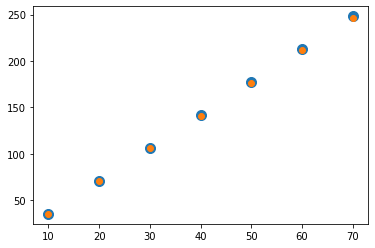

In [108]:
%matplotlib inline
plt.plot(Ls,model1,'o',markersize=10)
plt.plot(Ls,model2,'o')

# Plotando um exemplo de dados para observar a função que é ajustada ao dados

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
y = np.array([13.78, 13.04, 12.74, 12.56, 12.44, 12.35])
p = np.linspace(10,60,6)#np.log10(np.linspace(10,60,6)/np.sqrt(np.pi))

In [10]:
model = lambda x: 10.9+2.2/x

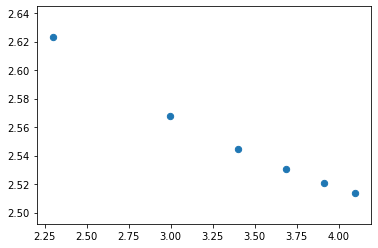

In [27]:
%matplotlib inline
t = np.linspace(0.7,1.75,100)
#plt.yscale('log')
#plt.xscale('log')
plt.scatter(np.log(p),np.log(y),s=40)
#plt.plot(t,model(t))

$$F(p) = e^{\frac{1}{\ln p}}$$

$$\frac{\ln e}{\ln p}=\log_p e$$

In [71]:
%%markdown
$$F(p)=e^{\log_p e}$$

$$F(p)=e^{\log_p e}$$


In [75]:
%%markdown
$$\ln y = \log_p e\Rightarrow p^{\ln y}=e$$

$$\ln y = \log_p e\Rightarrow p^{\ln y}=e$$


In [77]:
%%markdown
$$\frac{d}{dp}F(p)=-\frac{1}{p}\frac{1}{(\ln p)^2}e^{\frac{1}{\ln p}}$$

$$\frac{d}{dp}F(p)=-\frac{1}{p}\frac{1}{(\ln p)^2}e^{\frac{1}{\ln p}}$$


In [29]:
2/5

0.4

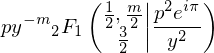

In [33]:
with assuming(Q.is_true(m!=2)):
    e = integrate(1/sqrt(x*x+y*y)**m,(x,0,p))
e

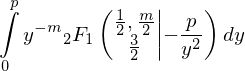

In [60]:
integrate(1/y**m*hyper((Rational(1,2),m/2),(Rational(3,2),),(-p/y**2)),(y,0,p))

In [48]:
N(exp_polar(2+I*3))

In [59]:
(3,)[0]

In [65]:
?limit

Signature: limit(e, z, z0, dir='+')
Docstring:
Compute the limit of ``e(z)`` at the point ``z0``.

``z0`` can be any expression, including ``oo`` and ``-oo``.

For ``dir="+-"`` it calculates the bi-directional limit; for
``dir="+"`` (default) it calculates the limit from the right
(z->z0+) and for dir="-" the limit from the left (z->z0-).
For infinite ``z0`` (``oo`` or ``-oo``), the ``dir`` argument is
determined from the direction of the infinity (i.e.,
``dir="-"`` for ``oo``).

Examples

>>> from sympy import limit, sin, Symbol, oo
>>> from sympy.abc import x
>>> limit(sin(x)/x, x, 0)
1
>>> limit(1/x, x, 0) # default dir='+'
oo
>>> limit(1/x, x, 0, dir="-")
-oo
>>> limit(1/x, x, 0, dir='+-')
Traceback (most recent call last):
    ...
ValueError: The limit does not exist since left hand limit = -oo and right hand limit = oo

>>> limit(1/x, x, oo)
0

Notes
=====

First we try some heuristics for easy and frequent cases like "x", "1/x",
"x**2" and similar, so that it's fast. For all oth

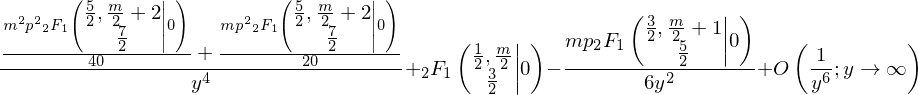

In [68]:
series(hyper((Rational(1,2),m/2),(Rational(3,2),),(-p/y**2)),y,oo)

In [71]:
e=hyper((Rational(1,2),m/2),(Rational(3,2),),0)

In [72]:
e.